In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [134]:
df = pd.read_csv("titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [136]:
# Check for missing values
print(df.isnull().sum())
# Summary statistics
print(df.describe())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  


In [156]:

# Handle missing values

df["Age"].fillna(df["Age"].median(), inplace=True)

df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)




# Encode categorical variables

label_enc = LabelEncoder()

df["Sex"] = label_enc.fit_transform(df["Sex"])

df["Embarked"] = label_enc.fit_transform(df["Embarked"])


C:\Users\CVR\AppData\Local\Temp\ipykernel_6656\4294448654.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\CVR\AppData\Local\Temp\ipykernel_6656\4294448654.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [166]:
X = df.drop(columns=["Survived"])

y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [168]:
dt_model = DecisionTreeClassifier(criterion="gini", random_state=42)

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [170]:
y_pred = dt_model.predict(X_test)

In [172]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")

 

print("\nClassification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 1.00

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



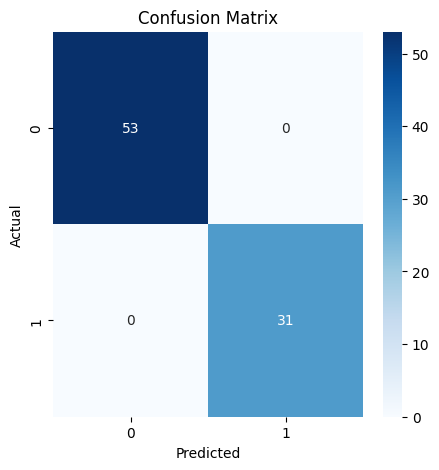

In [174]:
plt.figure(figsize=(5,5))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")

plt.xlabel("Predicted")

plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

***Visualizing Decision Tree***

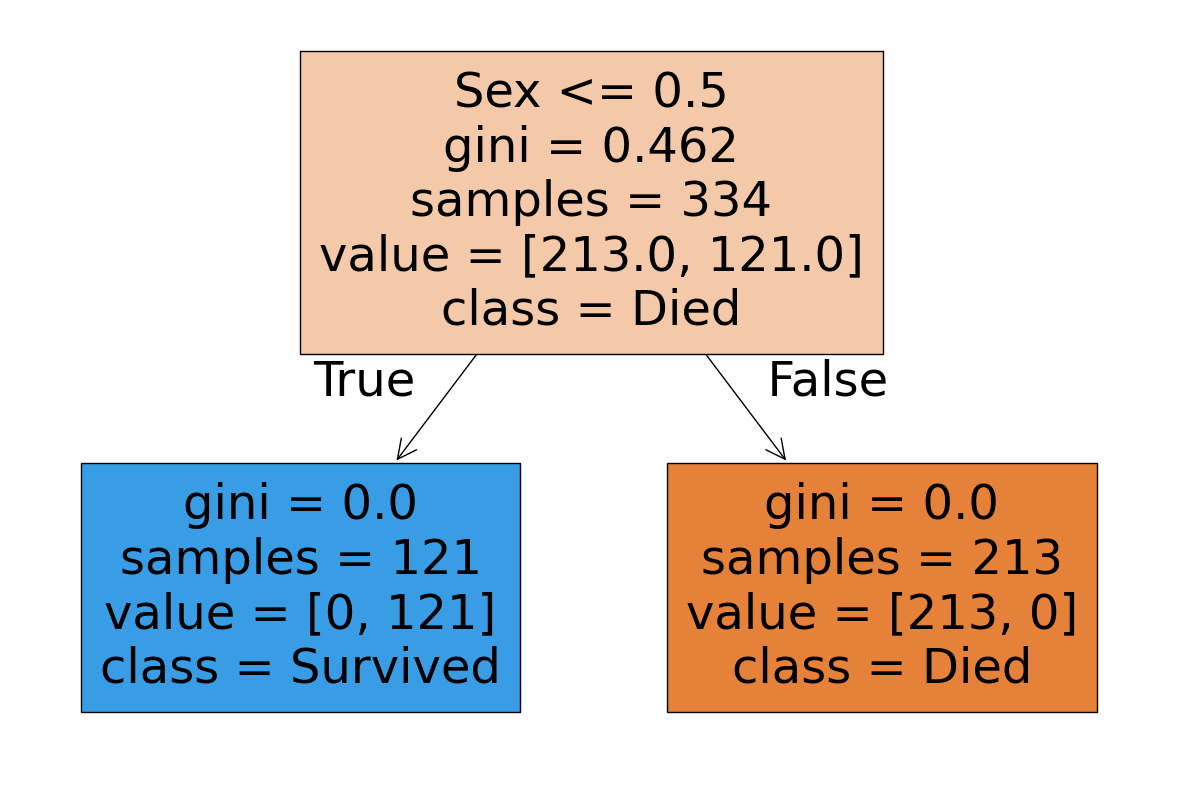

In [176]:
plt.figure(figsize=(15,10))

plot_tree(dt_model, feature_names=X.columns, class_names=["Died", "Survived"], filled=True)

plt.show()

***Random Forest***

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score,auc
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [182]:
df = pd.read_csv("titanic.csv")
df.head()

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [184]:
# Check for missing values
print(df.isnull().sum())
# Summary statistics
print(df.describe())


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  


In [186]:

# Handle missing values

df["Age"].fillna(df["Age"].median(), inplace=True)

df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)




# Encode categorical variables

label_enc = LabelEncoder()

df["Sex"] = label_enc.fit_transform(df["Sex"])

df["Embarked"] = label_enc.fit_transform(df["Embarked"])


C:\Users\CVR\AppData\Local\Temp\ipykernel_6656\4294448654.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\CVR\AppData\Local\Temp\ipykernel_6656\4294448654.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [188]:
X = df.drop(columns=["Survived"])

y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [192]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(criterion= 'entropy')
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy')

In [200]:
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns
X_train = X_train[numeric_cols]
X_test = X_test[numeric_cols]


In [204]:
df.drop(columns=["Cabin"], inplace=True)

In [206]:
df.drop(columns=["Ticket", "Name"], inplace=True)



In [208]:
y_pred = dt_model.predict(X_test)

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- Cabin
- Name
- Ticket
